In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
X, y_true=make_blobs(n_samples=500, centers=3,cluster_std=0.60, random_state=42)

In [5]:
df=pd.DataFrame(X,columns=['Feature1','Feature2'])

In [7]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

In [8]:
inertia=[]
K_range=range(1,11)

In [9]:
for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


In [10]:
inertia

[1000.0000000000006,
 297.8954141051723,
 11.575484723104985,
 9.752067977356848,
 8.257175272446279,
 6.917577320416797,
 6.334755391595288,
 5.704177177901426,
 5.060234133532074,
 4.7623618981303935]

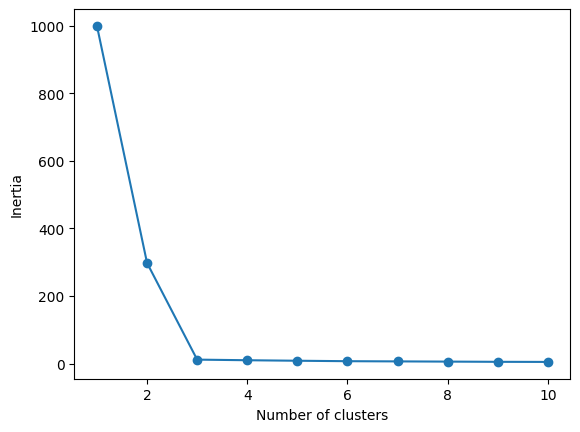

In [11]:
from numpy import ma
plt.plot(K_range,inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
kmeans_final=KMeans(n_clusters=3,random_state=42)

In [13]:
cluster_labels=kmeans_final.fit_predict(X_scaled)

In [14]:
df['cluster']=cluster_labels

<Axes: xlabel='Feature1', ylabel='Feature2'>

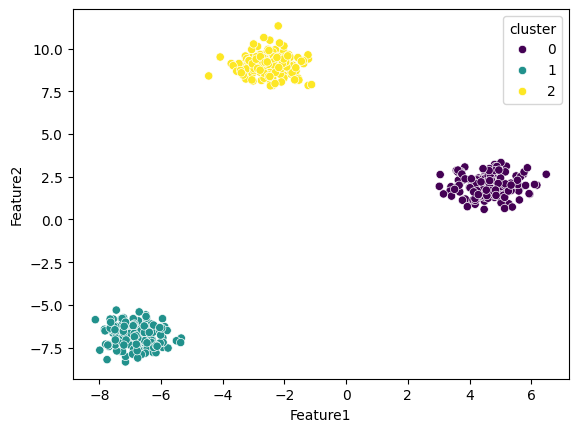

In [16]:
sns.scatterplot(x=df['Feature1'],y=df['Feature2'],
                hue=df['cluster'],palette='viridis')